<a href="https://colab.research.google.com/github/murillocosta/colab-storage/blob/main/landcoverAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Instalando biblioteca Geemap

In [ ]:
%pip install -U geemap

#### Importando das bibliotecas do Earth Engine, Geemap, Pandas

In [55]:
import ee
import geemap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Atenticando no Earth Engine

In [24]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=rU3BZFmybzl0UVCfA06Jzns6ZnJ7gsiJD_aigOkZaJM&tc=cZTDnoeednQEmLUzqm12c_mHKojm2ljs7Sk9N_R8oII&cc=6foHhf2oFXuEkoPFbLvIxqqnCR4JKua7aOuf7fsd4DI

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXnLg1c6GkUvnHfBXesAtc_FgrQWfED9Lwr-6tWqPfXZ5J7mw1pLTE8

Successfully saved authorization token.


#### Inicializndo o Earth Engine

In [25]:
ee.Initialize(project="ee-murilloalcosta")

#### Carregando a imagem de uso e cobertura do solo - Mapbiomas

In [26]:
mapbiomas = ee.Image("projects/mapbiomas-workspace/public/collection_S2_beta/collection_LULC_S2_beta")

#### Selecionando região de interesse: **Camaçari**

In [27]:
Camacari = ee.FeatureCollection('projects/ee-murilloalcosta/assets/Bahia/BA_Municipios_2022').filter(ee.Filter.eq('NM_MUN', 'Camaçari'))

#### Recortando a camada de classificação a partir da região de interesse

In [28]:
landcover_Camacari = mapbiomas.clip(Camacari)

#### Selecionando as camadas de classificação de uso da terra e cobertura terrestre para os anos de **2016** a **2022**

In [29]:
landcover_Camacari_2016 = landcover_Camacari.select('classification_2016')
landcover_Camacari_2017 = landcover_Camacari.select('classification_2017')
landcover_Camacari_2018 = landcover_Camacari.select('classification_2018')
landcover_Camacari_2019 = landcover_Camacari.select('classification_2019')
landcover_Camacari_2020 = landcover_Camacari.select('classification_2020')
landcover_Camacari_2021 = landcover_Camacari.select('classification_2021')
landcover_Camacari_2022 = landcover_Camacari.select('classification_2022')

#### Declarando paleta de cores para visualização

In [30]:
landcover_palette = [
    "#ffffff", "#32a65e", "#32a65e", "#1f8d49", "#7dc975", "#04381d", "#026975", "#000000",
    "#000000", "#7a6c00", "#ad975a", "#519799", "#d6bc74", "#d89f5c", "#FFFFB2", "#edde8e",
    "#000000", "#000000", "#f5b3c8", "#C27BA0", "#db7093", "#ffefc3", "#db4d4f", "#ffa07a",
    "#d4271e", "#db4d4f", "#0000FF", "#000000", "#000000", "#ffaa5f", "#9c0027", "#091077",
    "#fc8114", "#2532e4", "#93dfe6", "#9065d0", "#d082de", "#000000", "#000000", "#f5b3c8",
    "#c71585", "#f54ca9", "#cca0d4", "#dbd26b", "#807a40", "#e04cfa", "#d68fe2", "#9932cc",
    "#e6ccff", "#02d659", "#ad5100", "#000000", "#000000", "#000000", "#000000", "#000000",
    "#000000", "#CC66FF", "#FF6666", "#006400", "#8d9e8b", "#f5d5d5", "#ff69b4"
]


#### Declarando parâmetros de visualização

In [31]:
vis_params = {
    'palette': landcover_palette,
    'min': 0,
    'max': 62
}

#### Declarando Mapa e configurando altura de exibição do Mapa (Geemap)

In [32]:
Map = geemap.Map(height=1000)

#### Adicionando as camadas ao Mapa e centralizando exibição na área de interesse

In [33]:
Map.addLayer(landcover_Camacari_2016, vis_params, 'Uso do Solo Camaçari - 2016')
Map.addLayer(landcover_Camacari_2017, vis_params, 'Uso do Solo Camaçari - 2017')
Map.addLayer(landcover_Camacari_2018, vis_params, 'Uso do Solo Camaçari - 2018')
Map.addLayer(landcover_Camacari_2019, vis_params, 'Uso do Solo Camaçari - 2019')
Map.addLayer(landcover_Camacari_2020, vis_params, 'Uso do Solo Camaçari - 2020')
Map.addLayer(landcover_Camacari_2021, vis_params, 'Uso do Solo Camaçari - 2021')
Map.addLayer(landcover_Camacari_2022, vis_params, 'Uso do Solo Camaçari - 2022')
Map.centerObject(Camacari, 11)

#### Legendas MapBIOMAS

cores_hex = [
     "#32a65e", "#1f8d49", "#7dc975", "#04381d", "#026975", "#02d659", "#ad975a", "#519799",
     "#d6bc74", "#fc8114", "#ffaa5f", "#ad5100", "#d89f5c", "#FFFFB2", "#edde8e", "#E974ED",
     "#C27BA0", "#f5b3c8", "#db7093", "#c71585", "#ff69b4", "#f54ca9", "#d082de", "#d68fe2",
     "#9932cc", "#9065d0", "#e6ccff", "#7a5900", "#ffefc3", "#d4271e", "#ffa07a", "#d4271e",
     "#9c0027", "#db4d4f", "#0000FF", "#2532e4", "#091077", "#ffffff"
 ]

categorias = [
     "Floresta", "Formação Florestal", "Formação Savânica", "Mangue", "Floresta Alagável",
     "Restinga Arbórea", "Formação Natural não Florestal", "Campo Alagado e Área Pantanosa",
     "Formação Campestre", "Apicum", "Afloramento Rochoso", "Restinga Herbácea",
     "Outras Formações não Florestais", "Agropecuária", "Pastagem", "Agricultura",
     "Lavoura Temporária", "Soja", "Cana", "Arroz", "Algodão", "Outras Lavouras Temporárias",
     "Lavoura Perene", "Café", "Citrus", "Dendê", "Outras Lavouras Perenes", "Silvicultura",
     "Mosaico de Usos", "Área não Vegetada", "Praia, Duna e Areal", "Área Urbanizada", "Mineração",
     "Outras Áreas não Vegetadas", "Corpo D'água", "Rio, Lago e Oceano", "Aquicultura", "Não observado"
 ]

#### Declarando listas  de cores e categorias da região de interesse

In [ ]:
cores_hex = [
    "#1f8d49",
    "#04381d",
    "#02d659",
    "#ad5100",
    "#edde8e",
    "#E974ED",
    "#7a5900",
    "#ffefc3",
    "#ffa07a",
    "#d4271e",
    "#db4d4f",
    "#2532e4",
]

categorias = [
   "Formação Florestal",
   "Mangue",
   "Restinga Arbórea",
   "Restinga Herbácea",
   "Pastagem",
   "Agricultura",
   "Silvicultura",
   "Mosaico de Usos",
   "Praia, Duna e Areal",
   "Área Urbanizada",
   "Outras Áreas não Vegetadas",
   "Rio, Lago e Oceano",
]


#### Criando dicionário da legenda que será exibida

In [ ]:
legend_dictMapBiomas = {}

for i in range(len(categorias)):
    legend_dictMapBiomas[categorias[i]] = cores_hex[i]

#### Declarando estilos da legenda

In [ ]:
legend_style = {
    'position': 'fixed',
    'color': 'rgb(0,0,0)',
    'z-index': '9999',
    'border': '1px solid rgba(10, 10, 10, 0.5)',
    'background-color': 'rgba(240, 240, 240)',
    'border-radius': '4px',
    'padding': '5px',
    'fontSize': '14px',
    'bottom': '30px',
    'right': '8px',
}

#### Criando as legendas e defininindo parâmetros de configurações

In [ ]:
legends = geemap.create_legend(
    title="Classificação de Uso e Ocupação do Solo",
    legend_dict=legend_dictMapBiomas,
    draggable=False,
    style=legend_style
)

#### Adicionando legendas ao mapa

In [ ]:
Map.add_legend(legends)

#### Exibindo Mapa

In [34]:
Map

Map(center=[-12.66600333799656, -38.20627631073724], controls=(WidgetControl(options=['position', 'transparent…

#### Função para calcular areas(km²) por classificação do MapBiomas.

##### retorna uma featureCollection

In [35]:
def area_by_classification (image, roi, scale, bestEffort):

    pixelArea = ee.Image.pixelArea()
    # Reduzindo região de cada grupo (classes) e calculando a soma
    areas = pixelArea.addBands(image).reduceRegion(
        reducer = ee.Reducer.sum().group(groupField=1, groupName='classification'),
        geometry=roi,
        scale=scale,
        bestEffort=bestEffort
    )
    # Convertendo resultado em uma lista
    areaList = ee.List(areas.get('groups'))

    sqm_to_sqkm = ee.Number(1).divide(1000000)
    # Convertendo o resultado em FeatureCollection
    areas = ee.FeatureCollection(areaList.map(lambda area: ee.Feature(
    ee.Geometry.Point([0, 0]),
    {
        'classification': ee.Dictionary(area).get('classification'),
        'area_sqkm': ee.Number(ee.Dictionary(area).get('sum')).multiply(sqm_to_sqkm)
    }
    )))

    return areas

#### Atribuindo às variáveis os valores calculados de areas por classificação de cada ano

In [36]:
areas2016 = area_by_classification(landcover_Camacari_2016, Camacari, 100, True)
areas2017 = area_by_classification(landcover_Camacari_2017, Camacari, 100, True)
areas2018 = area_by_classification(landcover_Camacari_2018, Camacari, 100, True)
areas2019 = area_by_classification(landcover_Camacari_2019, Camacari, 100, True)
areas2020 = area_by_classification(landcover_Camacari_2020, Camacari, 100, True)
areas2021 = area_by_classification(landcover_Camacari_2021, Camacari, 100, True)
areas2022 = area_by_classification(landcover_Camacari_2022, Camacari, 100, True)

 #### Extraindo informações de classificação e área da coleção e armazenando essas informações em um dataframe

In [37]:
def make_df_from_col(areaCollection):
    data = areaCollection.getInfo()['features']

    classification = [item['properties']['classification'] for item in data]
    area_sqkm = [item['properties']['area_sqkm'] for item in data]

    df = pd.DataFrame({
    'Classification': classification,
    'Area (sq km)': area_sqkm
    })

    return df


#### Atribuindo dataframes às variáveis correspondentes

In [38]:
df2016 = make_df_from_col(areas2016)
df2017 = make_df_from_col(areas2017)
df2018 = make_df_from_col(areas2018)
df2019 = make_df_from_col(areas2019)
df2020 = make_df_from_col(areas2020)
df2021 = make_df_from_col(areas2021)
df2022 = make_df_from_col(areas2022)

##### Criando dicionário de classes para exibição no Mapa

In [50]:
dicionario_classes = {
    0:"Fora da área de interesse", 1:"Floresta", 3:"Formação Florestal",
    4:"Formação Savânica", 5:"Mangue", 49:"Restinga Arborizada",  10:"Formação Natural não Florestal",
    11:"Campo Alagado e Área Pantanosa",   12:"Formação Campestre",
    32:"Apicum",   29:"Afloramento Rochoso",   50:"Restinga Herbácea",
    13:"Outras Formações não Florestais",  14:"Agropecuária",
    15:"Pastagem",   18:"Agricultura",
    19:"Lavoura Temporária",   39:"Soja",
    20:"Cana",   40:"Arroz (beta)",   62:"Algodão (beta)",
    41:"Outras Lavouras Temporárias", 36:"Lavoura Perene",  46:"Café",
    47:"Citrus",  48:"Outras Lavouras Perenes",  9:"Silvicultura",
    21:"Mosaico de Usos",  22:"Área não Vegetada",  23:"Praia, Duna e Areal",
    24:"Área Urbanizada",  30:"Mineração", 25:"Outras Áreas não Vegetadas",
    26:"Corpo D'água", 33:"Rio, Lago e Oceano",
    31:"Aquicultura", 27:"Não observado"}

##### Função para criar uma coluna rótulo a partir da classificação usando o dicionário de classes

In [48]:
def cria_rotulos (df):
 df['rotulos'] = df['Classification'].replace(dicionario_classes)
 return df

#### Atribuindo  dataframes rotulados às variáveis correspondentes




In [54]:
df2016_com_rotulos = cria_rotulos(df2016)
df2022_com_rotulos = cria_rotulos(df2022)

#### Declarando dicionário com classes e cores correspondentes (MapBiomas)

In [60]:
dicionario_classes_cores = {'Floresta': '#32a65e',
 'Formação Florestal': '#1f8d49',
 'Formação Savânica': '#7dc975',
 'Mangue': '#04381d',
 'Floresta Alagável': '#026975',
 'Restinga Arborizada': '#02d659',
 'Formação Natural não Florestal': '#ad975a',
 'Campo Alagado e Área Pantanosa': '#519799',
 'Formação Campestre': '#d6bc74',
 'Apicum': '#fc8114',
 'Afloramento Rochoso': '#ffaa5f',
 'Restinga Herbácea': '#ad5100',
 'Outras Formações não Florestais': '#d89f5c',
 'Agropecuária': '#FFFFB2',
 'Pastagem': '#edde8e',
 'Agricultura': '#E974ED',
 'Lavoura Temporária': '#C27BA0',
 'Soja': '#f5b3c8',
 'Cana': '#db7093',
 'Arroz': '#c71585',
 'Algodão': '#ff69b4',
 'Outras Lavouras Temporárias': '#f54ca9',
 'Lavoura Perene': '#d082de',
 'Café': '#d68fe2',
 'Citrus': '#9932cc',
 'Dendê': '#9065d0',
 'Outras Lavouras Perenes': '#e6ccff',
 'Silvicultura': '#7a5900',
 'Mosaico de Usos': '#ffefc3',
 'Área não Vegetada': '#d4271e',
 'Praia, Duna e Areal': '#ffa07a',
 'Área Urbanizada': '#d4271e',
 'Mineração': '#9c0027',
 'Outras Áreas não Vegetadas': '#db4d4f',
 "Corpo D'água": '#0000FF',
 'Rio, Lago e Oceano': '#2532e4',
 'Aquicultura': '#091077',
 'Não observado': '#ffffff',
 'Fora da área de interesse': '#ffffff'}

#### Função para plotagem do gráfico


In [83]:
def plota_grafico(df, legend_dict, year):
   # Agrupando por rótulos e somando as áreas
    summed_areas = df.groupby('rotulos')['Area (sq km)'].sum()

    # Calculando a área total
    total_area = summed_areas.sum()

    # Calculando as porcentagens relativas à área total
    percentages = (summed_areas / total_area) * 100

    # Filtrando os rótulos cujas porcentagens são maiores ou iguais a 0.009%
    filtered_percentages = percentages[percentages >= 0.009]

    # Ordenando os valores para melhor visualização
    filtered_percentages = filtered_percentages.sort_values(ascending=False)

    # Criando lista de cores baseada na ordem dos rótulos
    colors = [legend_dict[label] for label in filtered_percentages.index]

    # Criando o gráfico de barras verticais com as cores definidas
    plt.figure(figsize=(12, 8))
    bars = plt.bar(filtered_percentages.index, filtered_percentages.values, color=colors)

    # Adicionando rótulos de dados em cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Porcentagem da Área Total')
    plt.xlabel('Rótulos de Classificação')
    plt.title(f'Área Total por Classificação do MapBiomas - {year}')
    plt.tight_layout()

    return plt.show()

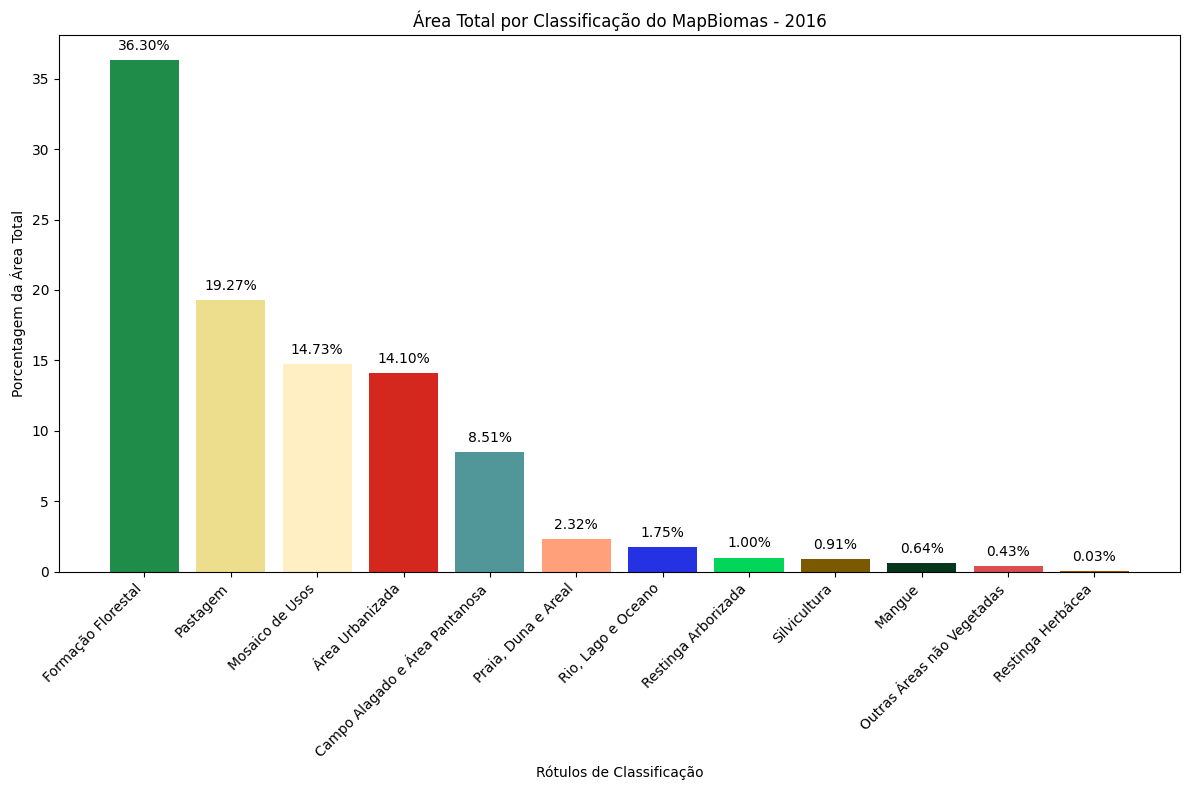

In [84]:
plota_grafico(df2016_com_rotulos, dicionario_classes_cores, 2016)

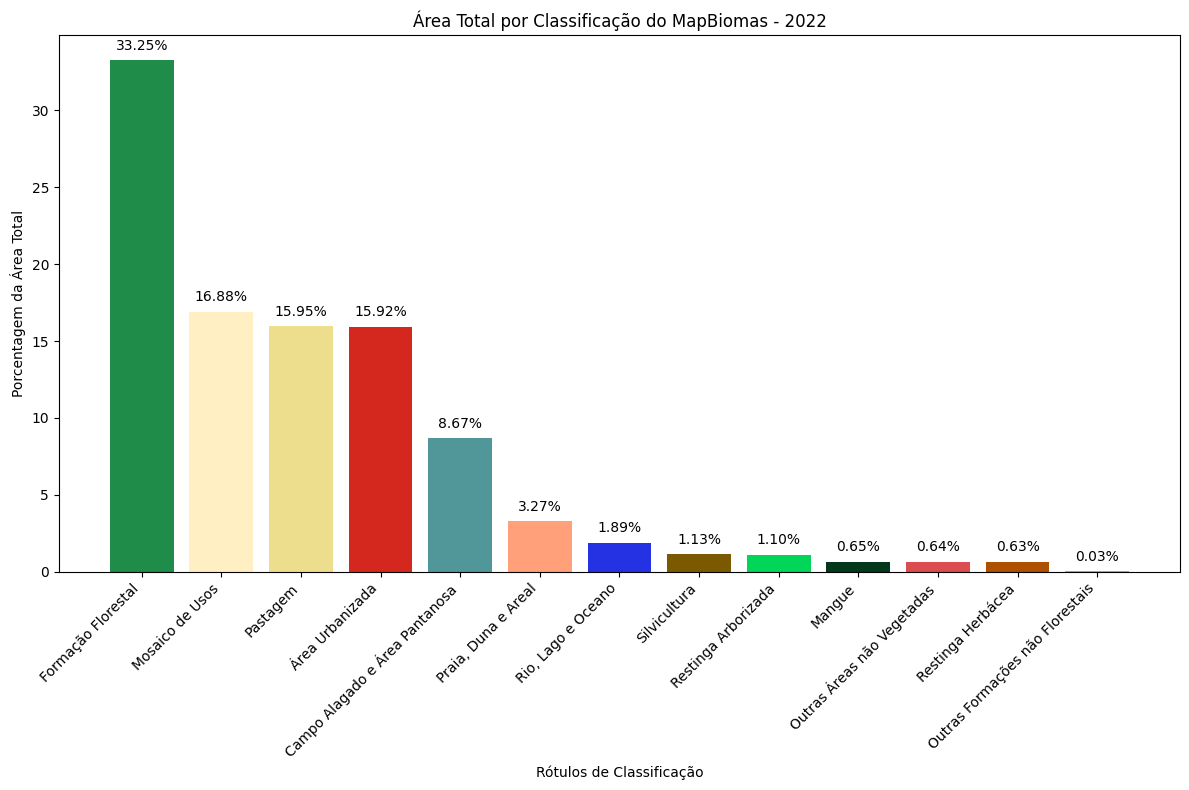

In [85]:
plota_grafico(df2022_com_rotulos, dicionario_classes_cores, 2022)